In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [86]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
demo_cluster = pd.read_csv('../data/occupation_demo_clusters_on_ed.csv')

In [13]:
d39 = pd.read_csv('../../cc_election_cleaning/all_rounds_results/district_39.csv')
d39_ag = pd.read_csv('../../cc_election_cleaning/all_rounds_results/district_39_one_two_ag.csv')

In [27]:
ed_level = pd.read_csv('../../cc_election_cleaning/occupation_demo_data_feb21.csv')

In [123]:
ed_shapefile = '../data/nyed_21a/nyed.shp'
ed_gdf = gpd.read_file(ed_shapefile)

In [28]:
ed_level.head()

,ElectDist,Shape_Leng,Shape_Area,geometry,mhhi21,"Agriculture, Forestry, Fishing and Hunting","Mining, Quarrying, and Oil and Gas Extraction",Utilities,Construction,Manufacturing,...,Health Care and Social Assistance,"Arts, Entertainment, and Recreation",Accommodation and Food Services,Other Services [except Public Administration],Public Administration,nha21p,nhb21p,nhw21p,h21p,cvap21bapp
0,23001,25826.498431,2.613472e+07,POLYGON ((1007309.8452148438 141975.6732177734...,62844.563214,0.068014,0.015505,0.920318,7.308238,3.036177,...,16.991394,2.939830,6.802960,4.764781,0.0,0.528821,0.237969,92.675833,5.499736,49.124546
1,23002,13932.130458,5.637463e+06,MULTIPOLYGON (((1006386.2789916992 144120.6552...,13556.267805,0.068014,0.015505,0.920318,7.308238,3.036177,...,16.991394,2.939830,6.802960,4.764781,0.0,0.528821,0.237969,92.675833,5.499736,49.124546
2,23006,8261.763819,3.188046e+06,POLYGON ((1025021.7086181641 147481.0651855468...,84445.233088,0.044635,0.015141,0.756079,5.464300,2.575456,...,27.309936,1.880209,7.300299,4.623432,0.0,1.037038,41.292122,48.437030,6.092313,42.876355
3,23008,9028.976073,2.914810e+06,POLYGON ((1026756.3640136719 147970.5953979492...,73710.182538,0.032087,0.017081,0.823579,5.659562,2.473481,...,28.100670,1.853644,7.139155,4.663934,0.0,1.490446,43.861566,47.499612,4.270416,45.508887
4,23009,8989.997452,2.779038e+06,POLYGON ((1027647.7304077148 148397.8187866211...,44232.335616,0.075256,0.017490,1.325195,6.315336,2.857157,...,19.497952,2.511162,8.900108,5.397475,0.0,2.076209,0.952618,77.088413,19.247677,46.041052


In [14]:
# split Precinct into AD and ED columns
d39_ag['AD'] = d39_ag['Precinct'].str.split(' ').str[1]
d39_ag['ED'] = d39_ag['Precinct'].str.split(' ').str[3]

In [16]:
d39_ag['ed_name'] = d39_ag['AD'].astype(str) + d39_ag['ED'].astype(str).str.zfill(3)

In [19]:
d39_ag['ed_name'] = d39_ag['ed_name'].astype('Int64')

In [30]:
d39['AD'] = d39['Precinct'].str.split(' ').str[1]
d39['ED'] = d39['Precinct'].str.split(' ').str[3]

d39['ed_name'] = d39['AD'].astype(str) + d39_ag['ED'].astype(str).str.zfill(3)

d39['ed_name'] = d39['ed_name'].astype('Int64')

In [35]:
d39_demo = d39_ag.merge(ed_level, left_on='ed_name', right_on ='ElectDist',how='left')

In [100]:
d39_demo.columns

Index(['Precinct', 'SKH_BW', 'SKH_notBW', 'BW_SKH', 'BW_notSKH', 'neither',
       'biggest', 'AD', 'ED', 'ed_name', 'ElectDist', 'Shape_Leng',
       'Shape_Area', 'geometry', 'mhhi21',
       'Agriculture, Forestry, Fishing and Hunting',
       'Mining, Quarrying, and Oil and Gas Extraction', 'Utilities',
       'Construction', 'Manufacturing', 'Wholesale Trade', 'Retail Trade',
       'Transportation and Warehousing', 'Information',
       'Finance and Insurance', 'Real Estate and Rental and Leasing',
       'Professional, Scientific, and Technical Services',
       'Management of Companies and Enterprises',
       'Administrative and Support and Waste Management and Remediation Services',
       'Educational Services', 'Health Care and Social Assistance',
       'Arts, Entertainment, and Recreation',
       'Accommodation and Food Services',
       'Other Services [except Public Administration]',
       'Public Administration', 'nha21p', 'nhb21p', 'nhw21p', 'h21p',
       'cvap21ba

In [ ]:
cols_to_keep = ['ElectDist','mhhi21','Construction', 'Manufacturing', 'Wholesale Trade', 'Retail Trade',
       'Transportation and Warehousing', 'Information',
       'Finance and Insurance', 'Real Estate and Rental and Leasing',
       'Professional, Scientific, and Technical Services',
       'Management of Companies and Enterprises',
       'Administrative and Support and Waste Management and Remediation Services',
       'Educational Services', 'Health Care and Social Assistance',
       'Arts, Entertainment, and Recreation',
       'Accommodation and Food Services',
       'Other Services [except Public Administration]',
       'Public Administration', 'h21p','nha21p', 'nhb21p', 'nhw21p', 'cvap21bapp']
df = d39_demo[cols_to_keep]
df = df.dropna()
features = df.drop(columns=['ElectDist'])

In [39]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [40]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

c:\Users\samtg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\samtg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\samtg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\samtg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

Text(0.5, 0, 'Number of clusters')

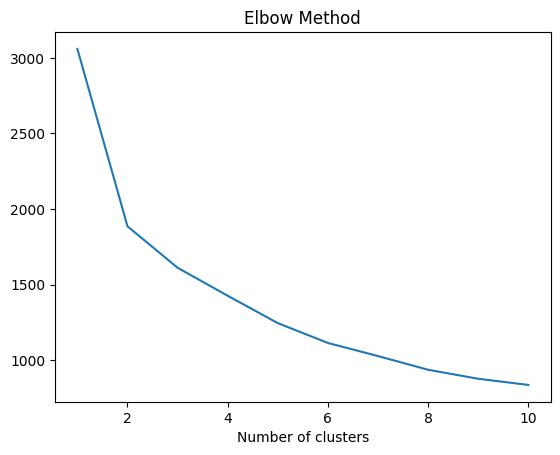

In [41]:
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')

In [59]:
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(scaled_features)
d39_demo['cluster'] = kmeans.labels_

c:\Users\samtg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [43]:
averages = df.groupby('cluster').mean().reset_index()

In [44]:
job_cols = ['Construction', 'Manufacturing', 'Wholesale Trade',
       'Retail Trade', 'Transportation and Warehousing', 'Information',
       'Finance and Insurance',
       'Professional, Scientific, and Technical Services',
       'Management of Companies and Enterprises', 'Educational Services',
       'Health Care and Social Assistance',
       'Arts, Entertainment, and Recreation',
       'Accommodation and Food Services']
race_cols = ['h21p', 'nha21p', 'nhb21p', 'nhw21p']

In [ ]:
averages = df.groupby('cluster').mean().reset_index()
averages['top_three'] = averages[job_cols].apply(lambda row: row.nlargest(3).index.tolist(), axis=1)
averages['max_race_col'] = averages[race_cols].idxmax(axis=1)

In [89]:
averages.columns

Index(['cluster', 'ElectDist', 'mhhi21', 'Construction', 'Manufacturing',
       'Wholesale Trade', 'Retail Trade', 'Transportation and Warehousing',
       'Information', 'Finance and Insurance',
       'Real Estate and Rental and Leasing',
       'Professional, Scientific, and Technical Services',
       'Management of Companies and Enterprises',
       'Administrative and Support and Waste Management and Remediation Services',
       'Educational Services', 'Health Care and Social Assistance',
       'Arts, Entertainment, and Recreation',
       'Accommodation and Food Services',
       'Other Services [except Public Administration]',
       'Public Administration', 'h21p', 'nha21p', 'nhb21p', 'nhw21p',
       'cvap21bapp', 'top_three', 'max_race_col'],
      dtype='object')

In [90]:
# change pd settings to display all of the text in a cell
pd.set_option('display.max_colwidth', None)


In [92]:
averages[['cluster', 'h21p', 'nha21p', 'nhb21p', 'nhw21p','cvap21bapp','mhhi21','Retail Trade','Professional, Scientific, and Technical Services',
          'Accommodation and Food Services',]]

,cluster,h21p,nha21p,nhb21p,nhw21p,cvap21bapp,mhhi21,Retail Trade,"Professional, Scientific, and Technical Services",Accommodation and Food Services
0,0,21.885675,8.810630,9.385590,55.838791,62.818195,126562.932716,8.130081,13.143638,9.261034
1,1,22.681543,13.263648,23.937006,36.124975,30.578342,90173.480149,12.419709,6.692935,9.246053
2,2,41.852288,17.693615,8.070016,24.347287,33.721714,106125.909448,16.981900,8.183496,7.787149
3,3,12.247146,15.500726,17.081073,48.518506,50.654109,88424.569641,9.443829,10.173266,9.404639
4,4,24.292856,30.412426,10.213353,30.041065,37.880201,33809.688417,12.159311,8.013746,10.378072
5,5,31.259850,9.302283,12.790650,42.337309,51.663651,131907.786015,9.334663,11.843516,9.897896


In [54]:
df_gdf = df.merge(ed_gdf, on='ElectDist', how='left')
df_gdf = gpd.GeoDataFrame(df_gdf)

In [56]:
df_gdf['cluster'] = df_gdf['cluster'].astype('category')

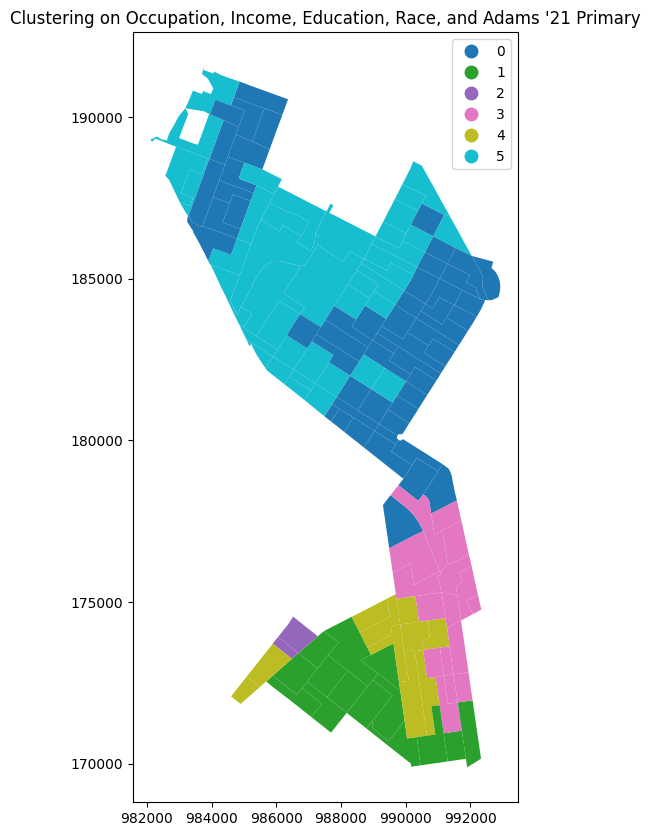

In [57]:
df_gdf.plot(column='cluster', cmap='tab10', legend=True, figsize=(15, 10))
plt.title("Clustering on Occupation, Income, Education, Race, and Adams '21 Primary")
plt.show()

In [58]:
df.head()

,ElectDist,mhhi21,Construction,Manufacturing,Wholesale Trade,Retail Trade,Transportation and Warehousing,Information,Finance and Insurance,Real Estate and Rental and Leasing,...,"Arts, Entertainment, and Recreation",Accommodation and Food Services,Other Services [except Public Administration],Public Administration,h21p,nha21p,nhb21p,nhw21p,cvap21bapp,cluster
0,42001,35758.521005,3.198568,2.242134,3.699370,9.343105,3.387870,5.922974,8.180075,3.322286,...,2.450141,9.766843,5.099254,0.000000e+00,8.971209,8.895774,24.830710,50.120287,53.354581,3
1,44001,36996.369308,3.671266,2.978972,4.758598,12.817742,2.908465,3.532807,4.585076,3.701934,...,1.965596,9.004513,5.114050,0.000000e+00,19.435838,3.128800,29.694956,46.241255,20.621832,1
2,44002,154397.468455,4.000157,3.276925,4.359860,13.077331,3.378901,3.185042,5.017817,3.327248,...,2.022961,9.759037,5.512677,7.119734e-11,24.977137,16.100034,21.520989,34.571051,30.406690,1
3,44003,167227.222576,4.018387,3.329660,4.382340,13.085376,3.433024,3.185958,5.035214,3.284435,...,2.008160,9.727116,5.512378,4.639038e-11,23.541154,16.553609,21.715165,35.252250,31.213423,1
4,44004,71216.995386,3.641243,3.003405,4.707889,12.138547,4.143061,3.078540,5.667247,3.187705,...,1.581179,8.406312,5.539997,0.000000e+00,16.311521,18.633988,22.072902,34.972053,32.791856,1


In [60]:
ag = d39_demo.groupby('cluster')[['SKH_BW', 'SKH_notBW', 'BW_SKH', 'BW_notSKH']].sum().reset_index()

In [61]:
ag

,cluster,SKH_BW,SKH_notBW,BW_SKH,BW_notSKH
0,0,2380,2222,1881,1415
1,1,92,238,32,56
2,2,3,3,7,4
3,3,760,779,412,271
4,4,263,407,123,82
5,5,1505,1117,1307,1076


The flow of second round votes doesn't seem to reveal much. Going to bring back in the vote share data, see if that leads us anywhere.

In [93]:
full_results = pd.read_csv('../../cc_election_cleaning/election_results_with_vote_sponsor_cluster_FEB13.csv')

In [94]:
full_results.columns

Index(['Precinct', 'vote', 'total_vote_precinct', 'vote_share', 'ed_name',
       'winner', 'rank', 'district', 'candidate', 'matched_name',
       'kmode_cluster', 'member', 'ElectDist_x', 'ML4', 'ML6', 'ML5', 'ML2',
       'ML7', 'ML3', 'ML1', 'district_cluster', 'ElectDist_y', 'Shape_Leng',
       'Shape_Area', 'geometry', 'min_noise', 'max_noise',
       'summer_noise_complaints', 'min_arrests', 'max_arrests', 'density',
       'ldensity', 'p21own', 'p21rent', 'mhhi21', 'mean_noise', 'mean_arrests',
       'living_alone_ratio', 'same_sex_ratio', 'black_nys_ratio',
       'black_fb_ratio', 'white_transplant_ratio', 'femHHH_ratio',
       'drive_ratio', 'train_ratio', 'walk_ratio', 'bike_ratio', 'wfh_ratio',
       'bus_ratio', 'hh21olongp', 'h21p', 'nha21p', 'nhb21p', 'nhw21p',
       'mex21p', 'prican21p', 'domin21p', 'colomb21p', 'kor21p', 'chin21p',
       'venez21p', 'hh21op', 'hh21rc', 'range_of_arrests', 'range_of_noise',
       'cvap21bapp', 'rv21irp', 'rv21italp', 'pg20jrbp'

In [104]:
full_results = full_results[['ed_name','vote', 'total_vote_precinct', 'vote_share', 
       'winner', 'rank', 'district', 'candidate',
       'mex21p', 'prican21p', 'domin21p', 'colomb21p', 'kor21p', 'chin21p',
       'venez21p', 'hh21op']]

In [105]:
hanif = full_results[full_results['candidate'] == 'Shahana K. Hanif']

In [106]:
hanif_demo = hanif.merge(d39_demo, left_on='ed_name', right_on='ed_name', how='left')

In [107]:
hanif_demo.columns

Index(['ed_name', 'vote', 'total_vote_precinct', 'vote_share', 'winner',
       'rank', 'district', 'candidate', 'mex21p', 'prican21p', 'domin21p',
       'colomb21p', 'kor21p', 'chin21p', 'venez21p', 'hh21op', 'Precinct',
       'SKH_BW', 'SKH_notBW', 'BW_SKH', 'BW_notSKH', 'neither', 'biggest',
       'AD', 'ED', 'ElectDist', 'Shape_Leng', 'Shape_Area', 'geometry',
       'mhhi21', 'Agriculture, Forestry, Fishing and Hunting',
       'Mining, Quarrying, and Oil and Gas Extraction', 'Utilities',
       'Construction', 'Manufacturing', 'Wholesale Trade', 'Retail Trade',
       'Transportation and Warehousing', 'Information',
       'Finance and Insurance', 'Real Estate and Rental and Leasing',
       'Professional, Scientific, and Technical Services',
       'Management of Companies and Enterprises',
       'Administrative and Support and Waste Management and Remediation Services',
       'Educational Services', 'Health Care and Social Assistance',
       'Arts, Entertainment, and Recr

In [108]:
cols_to_keep = ['ed_name','mhhi21','Construction', 'Manufacturing', 'Wholesale Trade', 'Retail Trade',
       'Transportation and Warehousing', 'Information',
       'Finance and Insurance', 'Real Estate and Rental and Leasing',
       'Professional, Scientific, and Technical Services',
       'Management of Companies and Enterprises',
       'Administrative and Support and Waste Management and Remediation Services',
       'Educational Services', 'Health Care and Social Assistance',
       'Arts, Entertainment, and Recreation',
       'Accommodation and Food Services',
       'Other Services [except Public Administration]',
       'Public Administration', 'h21p','nha21p', 'nhb21p', 'nhw21p', 'cvap21bapp',
       'mex21p', 'prican21p', 'domin21p', 'colomb21p', 'kor21p', 'chin21p',
       'venez21p', 'hh21op']
df = hanif_demo[cols_to_keep]
df = df.dropna()
features = df.drop(columns=['ed_name'])

In [109]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [110]:
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(scaled_features)
hanif_demo['cluster'] = kmeans.labels_

c:\Users\samtg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [112]:
averages = hanif_demo.groupby('cluster')[cols_to_keep].mean().reset_index()
averages['top_three'] = averages[job_cols].apply(lambda row: row.nlargest(3).index.tolist(), axis=1)
averages['max_race_col'] = averages[race_cols].idxmax(axis=1)

In [114]:
averages[['cluster', 'nhw21p','nha21p','h21p','cvap21bapp','mhhi21','top_three']]

,cluster,nhw21p,nha21p,h21p,cvap21bapp,mhhi21,top_three
0,0,63.186542,10.573839,14.144892,69.432310,136471.108628,"[Professional, Scientific, and Technical Services, Finance and Insurance, Health Care and Social Assistance]"
1,1,42.933197,18.498809,17.656249,48.605038,70386.530057,"[Health Care and Social Assistance, Retail Trade, Professional, Scientific, and Technical Services]"
2,2,33.915731,16.588399,22.687411,31.624203,81862.994027,"[Health Care and Social Assistance, Retail Trade, Accommodation and Food Services]"
3,3,53.698162,8.610324,23.257584,60.675457,128552.176583,"[Health Care and Social Assistance, Professional, Scientific, and Technical Services, Finance and Insurance]"
4,4,24.347287,17.693615,41.852288,33.721714,106125.909448,"[Retail Trade, Health Care and Social Assistance, Finance and Insurance]"
5,5,43.649368,8.630897,31.507349,52.964777,137221.667009,"[Health Care and Social Assistance, Professional, Scientific, and Technical Services, Accommodation and Food Services]"


In [115]:
hanif_demo.groupby('cluster')['vote_share'].mean().reset_index()

,cluster,vote_share
0,0,26.570508
1,1,40.696962
2,2,25.955160
3,3,31.893101
4,4,17.291667
5,5,29.849580


In [124]:
df_gdf = hanif_demo.merge(ed_gdf,left_on='ed_name' ,right_on='ElectDist', how='left')
